In [2]:
%matplotlib inline
import math
import pandas, numpy, scipy.stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [5]:
data_sat = pandas.read_excel("sat.xls")
data_sat.head()

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47


In [6]:
data_sat.shape

(105, 5)

<function matplotlib.pyplot.show>

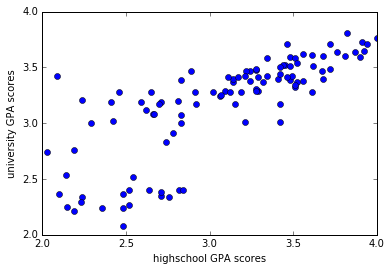

In [9]:
plt.plot(data_sat['high_GPA'], data_sat['univ_GPA'], 'o')
plt.xlabel('highschool GPA scores')
plt.ylabel('university GPA scores')
plt.show


In [10]:
y = 0.675*data_sat['high_GPA']+1.097
type(y)

pandas.core.series.Series

<function matplotlib.pyplot.show>

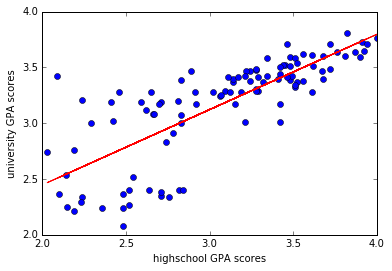

In [11]:
plt.plot(data_sat['high_GPA'], data_sat['univ_GPA'], 'o')
l = plt.plot(data_sat['high_GPA'], y, 'r', linewidth=1)
plt.xlabel('highschool GPA scores')
plt.ylabel('university GPA scores')
plt.show

In [12]:
def slope(x, y):
    r= scipy.stats.pearsonr(x, y)[0]
    b = r*y.std()/x.std()
    return (b)

def intercept(b, x, y):
    return (y.mean()-b*x.mean())


In [14]:
df = pandas.DataFrame({'X':[1,2,3,4,8], 'Y':[2,3,5,6,7]})
b = slope(df['X'], df['Y'])
A = intercept(b, df['X'], df['Y'])
Yp = b*df['X'] + A

In [22]:
df['Yp'] = Yp
df.head()

,X,Y,Yp
0,1,2,2.801370
1,2,3,3.493151
2,3,5,4.184932
3,4,6,4.876712
4,8,7,7.643836


In [26]:
df['Xst'] = (df['X']-df['X'].mean())/df['X'].std()
df.head()

,X,Y,Yp,Xst
0,1,2,2.801370,-0.962303
1,2,3,3.493151,-0.592187
2,3,5,4.184932,-0.222070
3,4,6,4.876712,0.148047
4,8,7,7.643836,1.628513


In [27]:
df['h'] = (df['Xst']**2+1)/5
df.head()

,X,Y,Yp,Xst,h
0,1,2,2.801370,-0.962303,0.385205
1,2,3,3.493151,-0.592187,0.270137
2,3,5,4.184932,-0.222070,0.209863
3,4,6,4.876712,0.148047,0.204384
4,8,7,7.643836,1.628513,0.730411


In [28]:
df['res'] = df['Y'] - df['Yp']
df.head()

,X,Y,Yp,Xst,h,res
0,1,2,2.801370,-0.962303,0.385205,-0.801370
1,2,3,3.493151,-0.592187,0.270137,-0.493151
2,3,5,4.184932,-0.222070,0.209863,0.815068
3,4,6,4.876712,0.148047,0.204384,1.123288
4,8,7,7.643836,1.628513,0.730411,-0.643836


In [35]:
def meanSqureError(res):
   return(((res-res.mean())**2).sum()/(len(res)-2))

In [33]:
mse = meanSqureError(df['res'])
mse

1.0753424657534238

In [41]:
def studentizedResiduals(df, mse):
    df['s-res'] = df['res']/numpy.sqrt(mse*(1-df['h']))
    return (df)

In [42]:
df = studentizedResiduals(df, mse)
df.head()

,X,Y,Yp,Xst,h,res,s-res
0,1,2,2.801370,-0.962303,0.385205,-0.801370,-0.985586
1,2,3,3.493151,-0.592187,0.270137,-0.493151,-0.556654
2,3,5,4.184932,-0.222070,0.209863,0.815068,0.884239
3,4,6,4.876712,0.148047,0.204384,1.123288,1.214411
4,8,7,7.643836,1.628513,0.730411,-0.643836,-1.195778
